In [7]:
!pip3 install neuralprophet --user

  Using cached neuralprophet-0.8.0-py3-none-any.whl.metadata (9.1 kB)
  Using cached captum-0.8.0-py3-none-any.whl.metadata (26 kB)
  Using cached holidays-0.69-py3-none-any.whl.metadata (28 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached pytorch_lightning-1.9.5-py3-none-any.whl.metadata (23 kB)
  Using cached torch-2.6.0-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached torchmetrics-1.7.0-py3-none-any.whl.metadata (21 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached fsspec-2025.3.1-py3-none-any.whl.metadata (11 kB)
  Using cached lightning_utilities-0.14.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached aiohttp-3.11.14-cp312-cp312-win_amd64.whl.metadata (8.0 kB)
  Using cached jsonschema_specifications-2024.10.1

ERROR: Could not install packages due to an OSError: [WinError 2] Не удается найти указанный файл



1. Loading and preparing data...

2. Aggregating data by week...


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 98.81% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
WARNING - (NP.forecaster.fit) - Changing n_forecasts to 1. Without lags, the forecast can be computed for any future time, independent of lagged values
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.



4. Training NeuralProphet model...
Epoch 100: 100%|██████████| 100/100 [00:00<00:00, 3174.57it/s, loss=0.00475, v_num=2, MAE_val=0.168, RMSE_val=0.222, Loss_val=0.00656, RegLoss_val=0.000, MAE=0.143, RMSE=0.273, Loss=0.00656, RegLoss=0.000]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 95.238% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W




5. Making predictions...


INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 95.238% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 489.70it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


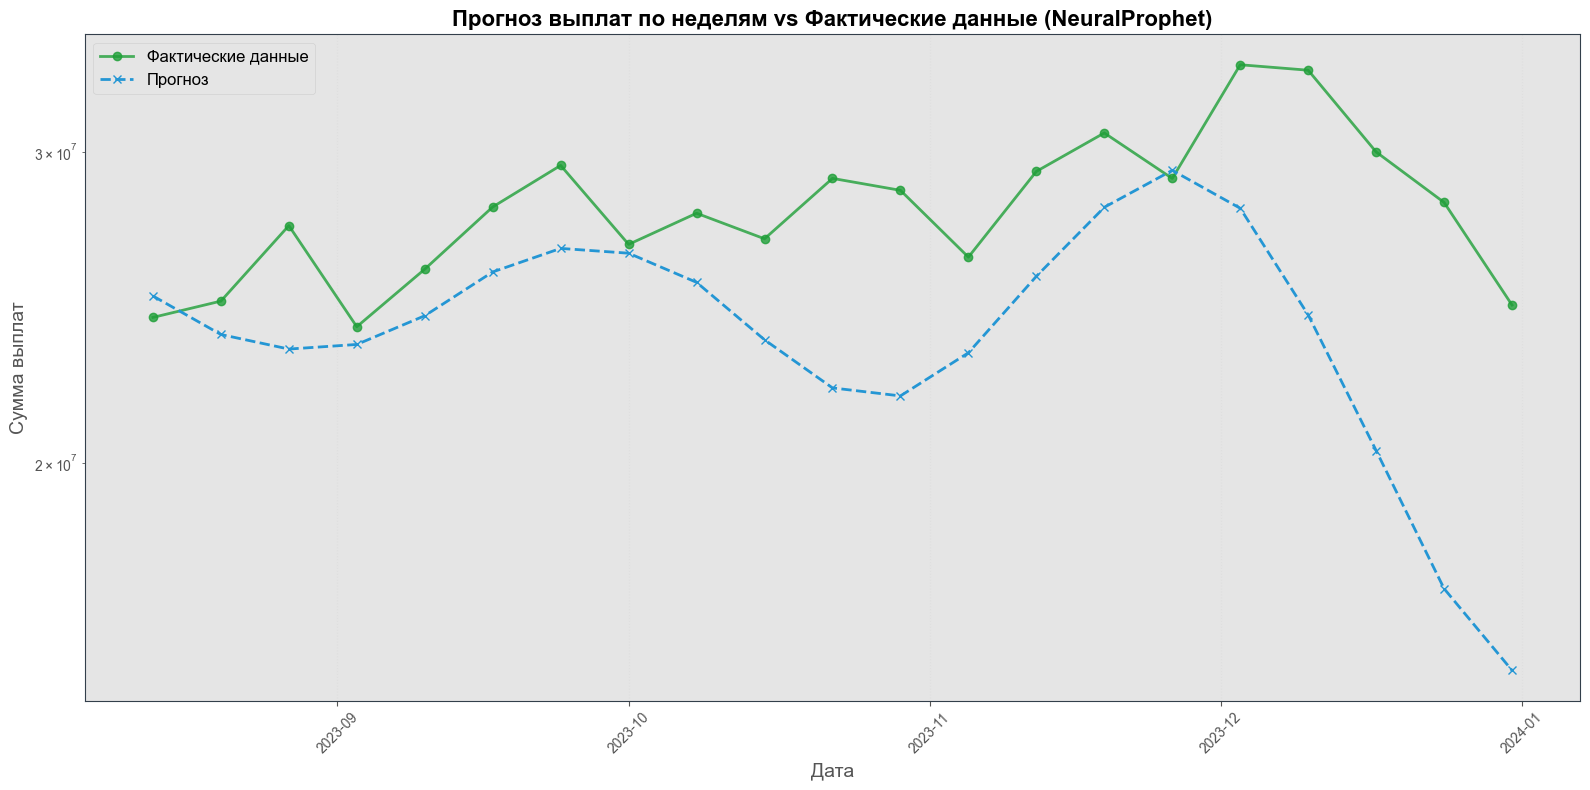

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 98.81% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 98.077% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 98.077% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W



Метрики теста NeuralProphet модели:
MAE: 4180250.94
MSE: 28443523527732.98
RMSE: 5333247.00
MAPE: 14.63%

Генерация прогноза на 1 год (52 недели)...
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.17it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


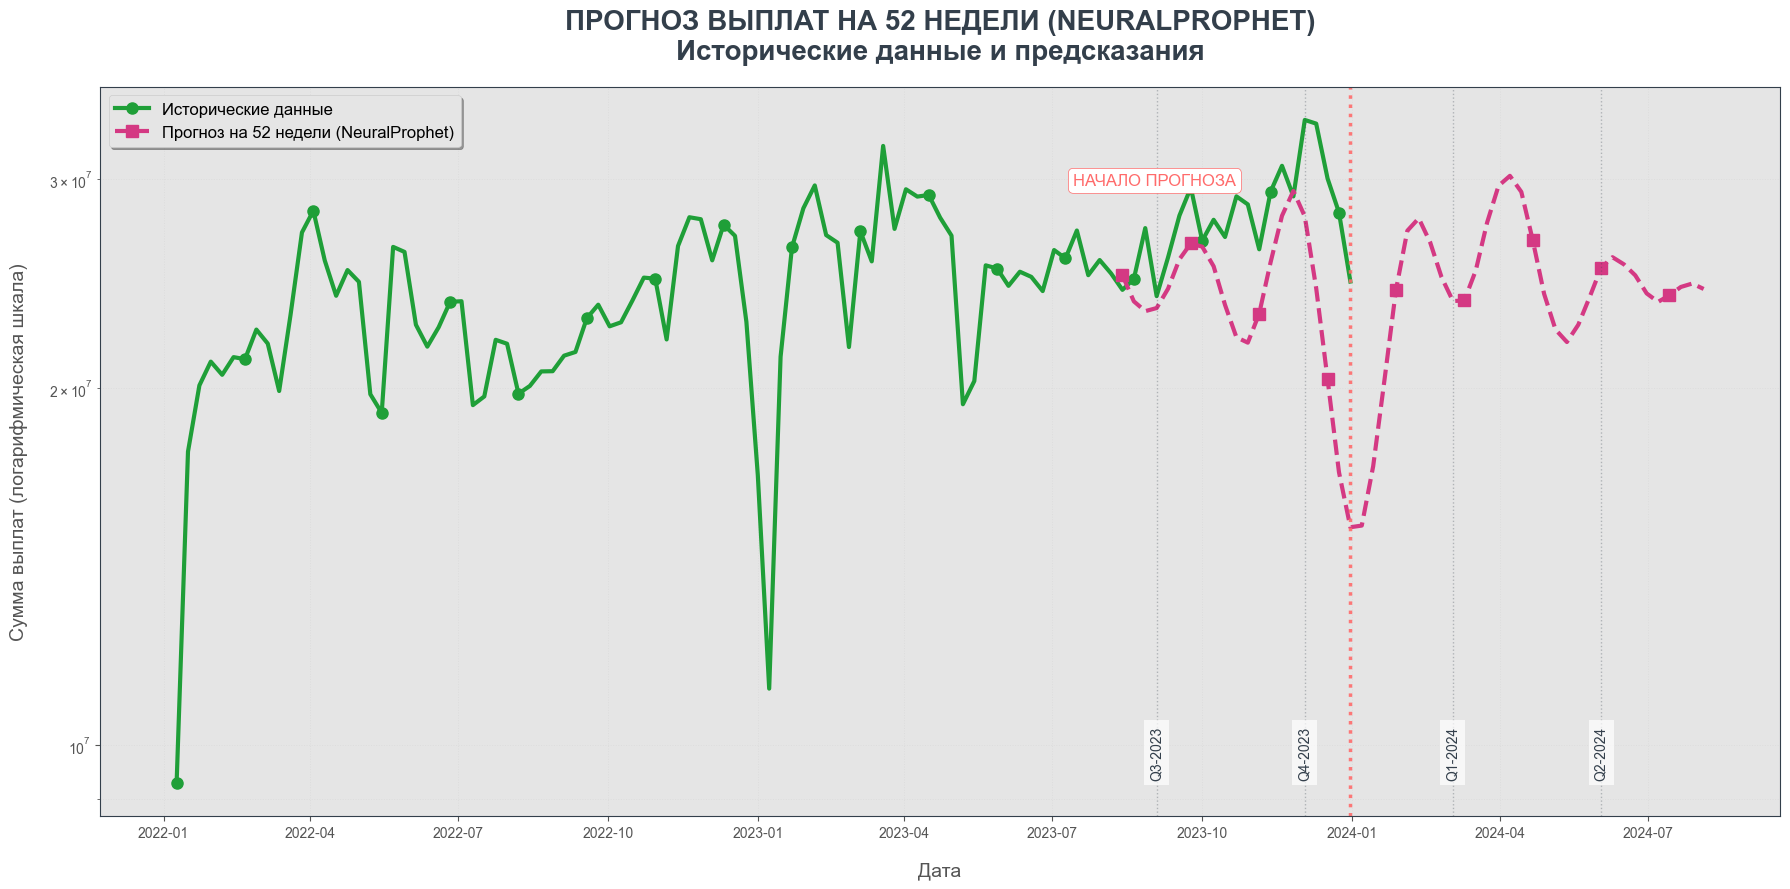


Quarterly Forecast Summary (NeuralProphet model):
                      sum        mean           std
year quarter                                       
2023 Q3       171379744.0  24482820.0  1.234367e+06
     Q4       329421888.0  23530134.0  4.055314e+06
2024 Q1       312721952.0  24055534.0  4.204162e+06
     Q2       325965088.0  25074238.0  2.482908e+06
     Q3       120547208.0  24109442.0  3.399261e+05

Detailed 52-week NeuralProphet forecast saved to 'neuralprophet_52week_forecast.csv'

Тест Льюнга-Бокса для остатков NeuralProphet модели:
      lb_stat  lb_pvalue
1    9.707843   0.001835
2   11.971694   0.002514
3   12.495399   0.005865
4   12.716114   0.012750
5   13.148170   0.022029
6   13.329457   0.038092
7   14.217811   0.047440
8   15.433727   0.051241
9   15.725726   0.072835
10  16.376848   0.089341

Значение p-value: 0.0893

Вывод: Остатки не демонстрируют значимой автокорреляции.


<Figure size 1200x500 with 0 Axes>

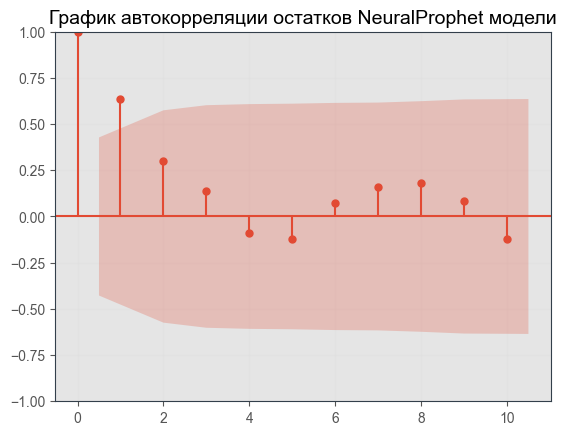

In [11]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# 1. Load and prepare data
print("1. Loading and preparing data...")
data = pd.read_csv(r"D:\repositories\cup_it_25\CupIT_Sber_data.csv", delimiter=";", decimal=',')
data['service_amount_net'] = pd.to_numeric(data['service_amount_net'], errors='coerce')
data['service_date'] = pd.to_datetime(data['service_date'])
data = data.dropna(subset=['service_date', 'service_amount_net'])

# 2. Aggregate by WEEK and apply log transform
print("\n2. Aggregating data by week...")
weekly_data = data.resample('W', on='service_date')['service_amount_net'].sum().to_frame('y')
weekly_data.index.name = 'ds'
weekly_data = weekly_data[weekly_data['y'] > 0]
weekly_data['y_log'] = np.log(weekly_data['y'])
weekly_data = weekly_data.reset_index()

# 3. Split data
train_size = int(len(weekly_data) * 0.8)
train_data = weekly_data.iloc[:train_size]
test_data = weekly_data.iloc[train_size:]

# 4. Build and train NeuralProphet model
print("\n4. Training NeuralProphet model...")
model = NeuralProphet(
    n_forecasts=52,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    batch_size=32,
    epochs=100,
    learning_rate=0.01,
    n_changepoints=15,
    seasonality_mode='additive'
)

# Fit model on log-transformed data
metrics = model.fit(train_data[['ds', 'y_log']].rename(columns={'y_log': 'y'}), 
                   freq='W', 
                   validation_df=test_data[['ds', 'y_log']].rename(columns={'y_log': 'y'}))

# 5. Make predictions
print("\n5. Making predictions...")
test_forecast = model.predict(test_data[['ds', 'y_log']].rename(columns={'y_log': 'y'}))
predictions = np.exp(test_forecast['yhat1'].values)
actual = np.exp(test_data['y_log'].values)

# 6. Visualization of results
plt.figure(figsize=(16, 8))
plt.plot(test_data['ds'], actual, label='Фактические данные', color='#1F9F38', 
         marker='o', markersize=6, alpha=0.8, linewidth=2)
plt.plot(test_data['ds'], predictions, label='Прогноз', color='#2496D4', 
         linestyle='--', marker='x', markersize=6, linewidth=2)
plt.title('Прогноз выплат по неделям vs Фактические данные (NeuralProphet)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Сумма выплат', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()
plt.show()

# 7. Calculate metrics
mae = mean_absolute_error(actual, predictions)
mse = mean_squared_error(actual, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual - predictions) / actual)) * 100

print("\nМетрики теста NeuralProphet модели:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# 8. Forecast for 1 year (52 weeks)
print("\nГенерация прогноза на 1 год (52 недели)...")
future = model.make_future_dataframe(train_data[['ds', 'y_log']].rename(columns={'y_log': 'y'}), 
                                    periods=52, n_historic_predictions=False)
future_forecast = model.predict(future)
future_predictions = np.exp(future_forecast['yhat1'].values)

# 9. Professional visualization of forecast
plt.figure(figsize=(18, 9), facecolor='white')
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.edgecolor'] = '#333F4B'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['grid.color'] = '#DDDDDD'

history_dates = weekly_data['ds'][-104:]
history_values = np.exp(weekly_data['y_log'][-104:])
forecast_dates = future['ds']
forecast_values = future_predictions

plt.plot(history_dates, history_values, label='Исторические данные', 
         color='#1F9F38', linewidth=3, marker='o', markersize=8, markevery=6)
plt.plot(forecast_dates, forecast_values, label='Прогноз на 52 недели (NeuralProphet)', 
         color='#D43983', linewidth=3, linestyle='--', marker='s', markersize=8, markevery=6)

plt.axvline(x=history_dates.iloc[-1], color='#FF6B6B', linestyle=':', linewidth=2.5, alpha=0.9)
plt.text(history_dates.iloc[-1] - pd.Timedelta(weeks=10), plt.ylim()[1]*0.85, 
         'НАЧАЛО ПРОГНОЗА', fontsize=12, color='#FF6B6B', ha='right', 
         bbox=dict(facecolor='white', edgecolor='#FF6B6B', boxstyle='round,pad=0.3'))

# Исправленный цикл для квартальных меток
for qdate in forecast_dates:
    if (qdate.month % 3 == 0) and (qdate.day < 7):  # Проверяем каждый элемент Series
        plt.axvline(x=qdate, color='#333F4B', linestyle=':', linewidth=1, alpha=0.3)
        quarter_label = f"Q{qdate.quarter}-{qdate.year}"
        plt.text(qdate, plt.ylim()[0] + (plt.ylim()[1]-plt.ylim()[0])*0.05, quarter_label, 
                 fontsize=10, color='#333F4B', ha='center', rotation=90, 
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('ПРОГНОЗ ВЫПЛАТ НА 52 НЕДЕЛИ (NEURALPROPHET)\nИсторические данные и предсказания', 
          fontsize=20, fontweight='bold', pad=20, color='#333F4B')
plt.xlabel('Дата', fontsize=14, labelpad=15)
plt.ylabel('Сумма выплат (логарифмическая шкала)', fontsize=14, labelpad=15)
plt.legend(frameon=True, fontsize=12, loc='upper left', shadow=True)
plt.yscale('log')
plt.grid(True, which="both", ls=":", linewidth=0.7)
plt.tight_layout()
plt.show()

# 10. Save detailed forecast
forecast_df = pd.DataFrame({
    'date': forecast_dates,
    'forecast_amount': future_predictions,
    'log_forecast': future_forecast['yhat1'].values
})
forecast_df['month'] = forecast_df['date'].dt.month_name()
forecast_df['quarter'] = 'Q' + forecast_df['date'].dt.quarter.astype(str)
forecast_df['year'] = forecast_df['date'].dt.year

quarterly_forecast = forecast_df.groupby(['year', 'quarter'])['forecast_amount'].agg(['sum', 'mean', 'std'])
print("\nQuarterly Forecast Summary (NeuralProphet model):")
print(quarterly_forecast)

forecast_df.to_csv('neuralprophet_52week_forecast.csv', index=False)
print("\nDetailed 52-week NeuralProphet forecast saved to 'neuralprophet_52week_forecast.csv'")

# 11. Residual analysis with Ljung-Box test
residuals = actual - predictions
max_possible_lags = min(10, len(residuals) - 1)

if max_possible_lags > 0:
    print("\nТест Льюнга-Бокса для остатков NeuralProphet модели:")
    lb_test = acorr_ljungbox(residuals, lags=max_possible_lags, return_df=True)
    print(lb_test)
    
    p_value = lb_test['lb_pvalue'].iloc[-1]
    print(f"\nЗначение p-value: {p_value:.4f}")
    
    if p_value > 0.05:
        print("\nВывод: Остатки не демонстрируют значимой автокорреляции.")
    else:
        print("\nВывод: Остатки содержат значимую автокорреляцию.")
        
    plt.figure(figsize=(12, 5))
    plot_acf(residuals, lags=max_possible_lags, alpha=0.05)
    plt.title('График автокорреляции остатков NeuralProphet модели', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("\nНедостаточно данных для теста Льюнга-Бокса.")